# Home Work2
## Perceptron Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


## Load dataset and EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


هدف از قطعه کد زیر نمایش داده ها است. همانطور که می بینیم داده های ما دو ستون مربوط به ویژگی دارند و ستون آخر مربوط به برچسب داده های ما می باشد که 0 و 1 هستند یعنی داده های ما مربوط به دو کلاس هستند. برای الگوریتم کلاس بند پرسپترون هم می توان از تابع پله و هم از تابع ساین استفاده کرد. چون ما می خواهیم از تابع ساین استفاده کنیم و خروجی تابع ساین(علامت) -1 و 1 می باشد پس داده هایی که برچسب 0 دارند را به -1 تبدیل می کنیم. این کار را هم برای داده های آموزشی و هم داده های تست انجام میدهیم. این کار مربوط به پیش پردارش داده ها است.

In [3]:
train = pd.read_csv('/content/drive/MyDrive/ML/HW2/train.csv')
train.head()

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0


در کد زیر برچسب های 0 به -1 تبدیل می شوند

In [4]:
train['label'].replace(to_replace= 0, value = -1, inplace=True )
train.head()

,feature1,feature2,label
0,-0.586110,-0.974014,-1.0
1,-1.503634,-0.505257,-1.0
2,-1.280899,-0.152307,-1.0
3,-0.023598,-1.526080,-1.0
4,1.336478,-1.159745,1.0


In [5]:
print(f'train shape : {train.shape}')

train shape : (4000, 3)


In [6]:
test = pd.read_csv('/content/drive/MyDrive/ML/HW2/test.csv')
test.head()

,feature1,feature2,label
0,0.932599,-0.056269,1.0
1,1.060621,-0.148805,1.0
2,-0.903985,0.654105,0.0
3,-0.229572,-1.122811,0.0
4,1.640519,-0.243509,1.0


In [7]:
test['label'].replace(to_replace= 0, value = -1, inplace=True )
test.head()

,feature1,feature2,label
0,0.932599,-0.056269,1.0
1,1.060621,-0.148805,1.0
2,-0.903985,0.654105,-1.0
3,-0.229572,-1.122811,-1.0
4,1.640519,-0.243509,1.0


In [8]:
print(f'test shape : {test.shape}')

test shape : (1000, 3)


### Plotting train data

همانطور که در شکل زیر می بینیم داده های ما بر اساس این دو ویژگی به صورت خطی جدا پذیر نیستند. پس با الگوریتم پرسپترون به خطای صفر قرار نیست برسیم و یه تعداد داده هستند که در هر صورت میس کلاسیفاید می شوند و در دسته ی درست قرار نمی گیرند.

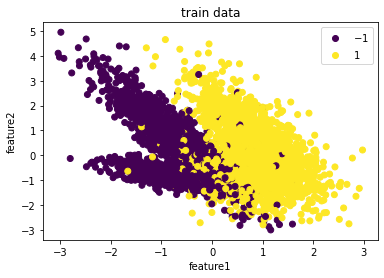

In [9]:
# plot train data
scatter = plt.scatter(train['feature1'],train['feature2'],c=train['label'])
plt.title('train data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(*scatter.legend_elements())
plt.show()

Lets find the range of each features to label each axis correctly.

In [10]:
print(f'range of feature 1 is : ({min(train.feature1)}, {max(train.feature1)}))')
print(f'range of feature 2 is : ({min(train.feature2)}, {max(train.feature2)}))')

range of feature 1 is : (-3.0444470141405446, 2.9779712359395747))
range of feature 2 is : (-3.0051726584145118, 4.948456783319423))


### Plotting test data

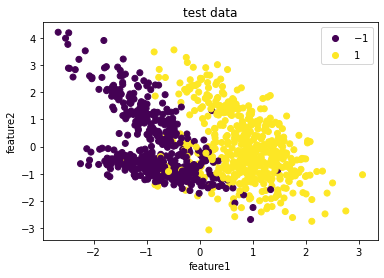

In [11]:
# plot test data
scatter = plt.scatter(test['feature1'],test['feature2'],c=test['label'])
plt.title('test data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(*scatter.legend_elements())
plt.show()

## Perceptron classifier

In [12]:
def sign(y):
	return 1 if y>=0 else -1

def predict(x, weights):
	'''calcute y_pred '''
	y_pred = np.dot(x, weights)
	y_pred = [sign(i) for i in y_pred]
	return y_pred

def accuracy(actual, predicted):
	'''Calculate accuracy percentage'''
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0  

For plotting perceptron with 2 inputs , we consider linear equation as follows: 

w0*x0 + w1*x1 + w2*x2 = 0

which is x0 is bias and we consider is as 1, so we have following equation:

w0 + w1*x1 + w2*x2 = 0

x2 = -w0/w2 - w1/w2 *x1

this means:

slope = -w1/w2 and intercept = -w0/w2

In [13]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def plot_percepron_classifier(data, w):
  '''plot data points and classifier'''
  fig, ax = plt.subplots()
  feature1min, feature1max = min(data.feature1), max(data.feature1)
  X = np.arange(feature1min, feature1max, 0.1) # for classifier
  ax.scatter(data['feature1'],data['feature2'],c=data['label']) # plot data points

  m = - w[1] / w[2] # slope
  c = - w[0] / w[2] # intercept
  print(f'slope : {m} and intercept : {c}')
  
  ax.plot(X, m * X + c ) # plot classifier
  plt.title(f'{get_df_name(data)} data')
  plt.xlabel('feature1')
  plt.ylabel('feature2')
  plt.legend(*scatter.legend_elements())
  plt.show()

فرم وزن ها به صورت زیر می باشد:

w = [w0, w1, w2]

np.random.seed(0) =>
به این منظور استفاده می شود تا در هر بار اجرای برنامه مقدار تصادفی یکسان باشد و در هر بار اجرا فرق نکند.

In [14]:
np.random.seed(0)
w = np.random.normal(0, 1, 3)
print(f'inital weight : {w}') 

inital weight : [1.76405235 0.40015721 0.97873798]


در شکل زیر کلاس بند پرسپترون را با وزن اولیه رندوم می بینیم که تقریب خوبی نیست ، پس در ادامه از الگوریتم یادگیری  پرسپترون استفاده می کنیم تا خطای ما کمتر شود و به سمت وزن های بهینه حرکت کنیم و در واقع خط جداساز در جای مناسبی قرار بگیرد.

slope : -0.4088501875533542 and intercept : -1.802374460391927


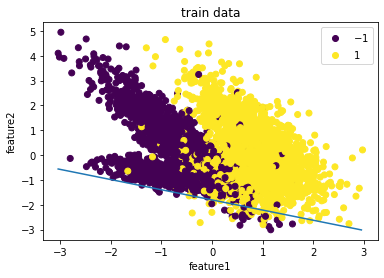

In [15]:
plot_percepron_classifier(train, w)

سپس در این قسمت داده ها را به شکل مناسب در می آوریم یعنی از داده هایی که داریم دو ستون اول را به عنوان ایکس جدا می کنیم و برای مقدار بایاس یه ستون با مقادیر یک به ابتدای ماتریس یک اضافه می کنیم.

برای خروجی هم ستون آخر داده را به عنوان ایگرگ جدا می کنیم

In [16]:
n = train.shape[0] # number of data
X_train = train.values[:, :2]
X_train = np.append(np.ones((n, 1)), X_train, axis=1) # bias values are in the first column of X
print(f'X_train : \n{X_train}')
print(f'X_train shape : {X_train.shape}')

y_train = train.values[:, 2]
print(f'y train: \n{y_train}')
print(f'y train shape : {y_train.shape}')

X_train : 
[[ 1.         -0.58611018 -0.97401381]
 [ 1.         -1.50363418 -0.50525685]
 [ 1.         -1.28089947 -0.15230724]
 ...
 [ 1.         -0.04169294 -1.37228904]
 [ 1.          0.23768469  0.39693034]
 [ 1.         -1.67283136  1.64919008]]
X_train shape : (4000, 3)
y train: 
[-1. -1. -1. ... -1.  1. -1.]
y train shape : (4000,)


In [17]:
n_test = test.shape[0] # number of data
X_test = test.values[:, :2]
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1) # bias values are in the first column of X
print(f'X_test : \n{X_test}')
print(f'X_test shape : {X_test.shape}')

y_test = test.values[:, 2]
print(f'y test: \n{y_test[:10]}')
print(f'y test shape : {y_test.shape}')

X_test : 
[[ 1.          0.93259865 -0.05626874]
 [ 1.          1.06062139 -0.14880485]
 [ 1.         -0.90398542  0.65410476]
 ...
 [ 1.         -2.66854104  4.20806794]
 [ 1.         -2.05086833 -0.2049629 ]
 [ 1.          2.08066176 -1.05265046]]
X_test shape : (1000, 3)
y test: 
[ 1.  1. -1. -1.  1. -1.  1.  1. -1.  1.]
y test shape : (1000,)


In [18]:
def train_test_accuracy(w):
  y_pred_train = predict(X_train, w)
  acc_train = accuracy(y_train, y_pred_train)
  y_pred_test = predict(X_test, w)
  acc_test = accuracy(y_test, y_pred_test)

  print(f'accuray for train data  : {acc_train}')
  print(f'accuray for test data  : {acc_test}')

همانطور که در زیر می بینیم در ابتدای کار با مقدار وزن های رندوم دقت کلاس بند ما روی داده های آموزشی وتست به ترتیب زیر است که نشان دهنده ی آن است که داده ها را به خوبی یاد نگرفته.

In [19]:
train_test_accuracy(w)

accuray for train data  : 49.7
accuray for test data  : 49.2


### Stochastic gradient descent for Perceptron

در سلول زیر الگوریتم مربوط به کلاس پرسپترون را مشاهده می کنیم که مقدار وزن اولیه، داده های آموزشی ، برچسب داده های آموزشی، تعداد ایپاک ها و نرخ یادگیری را به عنوان ورودی دریافت می کند. 
در زیر الگوریتم گرادیان کاهشی برای پرسپترون را داریم که مقادیر وزن ها به ازای هر داده آپدیت می شود .
و تعداد داده هایی که به درستی دشته بندی نشده اند در هر ایپاک برگردانده می شود و تا بتوانیم عملکرد کلاس بند را ارزیابی کنیم. چون داده ها به صورت خطی جدا پذیر نیستند باید برحسب معیار توقف الگوریتم را در موقعیت مناسب متوقف کنیم.

در االگوریتم زیر شرط توقف تعداد ایپاک ها است. اما می توان شرط توقف را روی دقت کلاس بند روی داده های آموزشی گذاشت و اگر از یه جایی به بعد دقت کلاس بند بهبود پیدا نکرد، دیگر الگوریتم را ادامه ندهیم.

In [20]:
def percepron_learning(w, X_train, y_train, epochs, learning_rate):

  for epoch in range(0,epochs): # loop over epochs
    misclassified = 0
    for i in range(0, X_train.shape[0]): # loop over dataset
      
      x = X_train[i] 
      y = y_train[i]
      y_pred = sign(np.dot(x, w))

      if y_pred != y: # if x is misclassified
        misclassified +=1
        w = w + learning_rate* np.dot(x, y)

    print(f'epoch :{epoch + 1} | misclassified : {misclassified}')  
  
  return w

ابتدا الگوریتم را برای 100 بار تکرار می کنیم همانطور که می بینیم در ابتدا 1270 داده به درستی کلاس بندی نشده بودند و در انتهای این 100 ایپاک تعداد داده هایی که به درستی کلاس بندی نشدند به 460 داده کاهش می یابد.

In [21]:
w_new = percepron_learning(w, X_train, y_train, 100, 0.001)

epoch :1 | misclassified : 1279
epoch :2 | misclassified : 492
epoch :3 | misclassified : 366
epoch :4 | misclassified : 339
epoch :5 | misclassified : 334
epoch :6 | misclassified : 332
epoch :7 | misclassified : 329
epoch :8 | misclassified : 327
epoch :9 | misclassified : 328
epoch :10 | misclassified : 329
epoch :11 | misclassified : 329
epoch :12 | misclassified : 328
epoch :13 | misclassified : 326
epoch :14 | misclassified : 327
epoch :15 | misclassified : 329
epoch :16 | misclassified : 322
epoch :17 | misclassified : 452
epoch :18 | misclassified : 459
epoch :19 | misclassified : 465
epoch :20 | misclassified : 460
epoch :21 | misclassified : 453
epoch :22 | misclassified : 465
epoch :23 | misclassified : 456
epoch :24 | misclassified : 465
epoch :25 | misclassified : 462
epoch :26 | misclassified : 453
epoch :27 | misclassified : 456
epoch :28 | misclassified : 465
epoch :29 | misclassified : 459
epoch :30 | misclassified : 460
epoch :31 | misclassified : 451
epoch :32 | misc

در زیر وزنی را که در انتهای این 100 ایپاک می رسیم را چاپ می کنیم و از آن برای محاسبه دقت کلاس بند روی داده های آموزشی و تست استفاده می کنیم.

In [22]:
print(f'w new : {w_new}')

w new : [5.23459677e-05 4.02562714e-03 3.81836054e-04]


در زیر دقت کلاس بند روی داده های آموزشی و تست را بعد از 100 ایپاک می بینیم.

In [23]:
train_test_accuracy(w_new)

accuray for train data  : 91.025
accuray for test data  : 91.60000000000001


slope : -10.54281569027015 and intercept : -0.13709016524749681


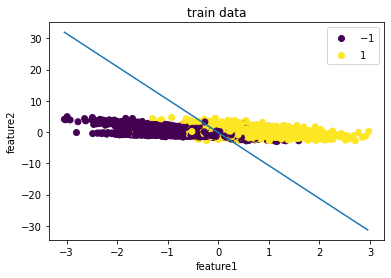

In [24]:
plot_percepron_classifier(train, w_new)

slope : -10.54281569027015 and intercept : -0.13709016524749681


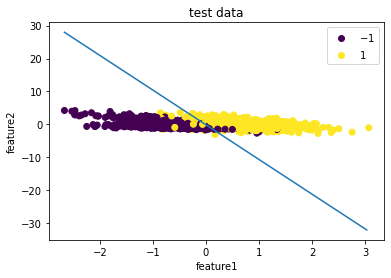

In [25]:
plot_percepron_classifier(test, w_new)

همانطور که در شکل های بالا می بینیم این خط تا حدودی توانسته داده های دو کلاس را از هم جدا کند و نسبت به وزن اولیه در جای مناسبی قرار گرفته است. اما همچنان داده هایی هستند که به درستی کلاس بندی نشدند . طبق الگوریتم یادگیری تا ایپاک100 ، هنوز 460 داده به درستی کلاس بندی نشدند. پس تعداد تکرار را افزایش می دهیم. تا ببینیم دقت چه تغییری می کند.

In [26]:
w_new = percepron_learning(w, X_train, y_train, 1500, 0.001)

epoch :1 | misclassified : 1279
epoch :2 | misclassified : 492
epoch :3 | misclassified : 366
epoch :4 | misclassified : 339
epoch :5 | misclassified : 334
epoch :6 | misclassified : 332
epoch :7 | misclassified : 329
epoch :8 | misclassified : 327
epoch :9 | misclassified : 328
epoch :10 | misclassified : 329
epoch :11 | misclassified : 329
epoch :12 | misclassified : 328
epoch :13 | misclassified : 326
epoch :14 | misclassified : 327
epoch :15 | misclassified : 329
epoch :16 | misclassified : 322
epoch :17 | misclassified : 452
epoch :18 | misclassified : 459
epoch :19 | misclassified : 465
epoch :20 | misclassified : 460
epoch :21 | misclassified : 453
epoch :22 | misclassified : 465
epoch :23 | misclassified : 456
epoch :24 | misclassified : 465
epoch :25 | misclassified : 462
epoch :26 | misclassified : 453
epoch :27 | misclassified : 456
epoch :28 | misclassified : 465
epoch :29 | misclassified : 459
epoch :30 | misclassified : 460
epoch :31 | misclassified : 451
epoch :32 | misc

همانطور که می بینیم با افزایش تعداد ایپاک ها به 1500، 468 داده درست کلاس بندی نشدند که در واقع خط جداساز ما بدتر از 100 ایپاک عمل کرده و اگر این 1500 ایپاک را نکاه کنیم متوجه می شویم که دقت و عملکرد کلاس بند ما بهبود چندانی پیدا نمی کند و گاهی اوقات بدتر هم میشود، زیرا ذاتا داده ها جداپذیر خطی نیستند و این تعدادی که اشتباه پیش بینی شدند در واقع مربوط به داده هایی است که در وسط شکل قرار دارند وداده های زرد و بنفش در یک ناحیه با هم مخلوط هستند. پس نیازی به 1500 ایپاک و این مقدار محاسبه نیست. اگر برای شرط توقف از دقت استفاده می کردیم بهتر بود.

In [27]:
print(f'w new : {w_new}')

w new : [5.23459677e-05 3.54518368e-03 2.11965323e-04]


همانطور که میبینیم دقت روی داده های آموزشی و تست نسبت به قبل کمی کمتر شده.

In [29]:
train_test_accuracy(w_new)

accuray for train data  : 90.325
accuray for test data  : 91.0


slope : -16.72530031768215 and intercept : -0.24695533715184992


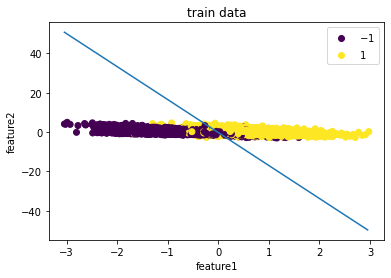

In [30]:
plot_percepron_classifier(train, w_new)

slope : -16.72530031768215 and intercept : -0.24695533715184992


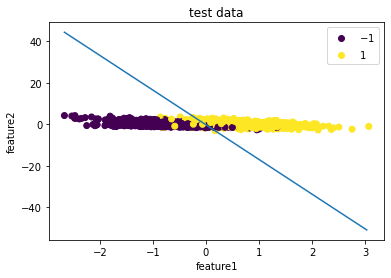

In [31]:
plot_percepron_classifier(test, w_new)

پس تا اینجای کار با ازمایش هایی که انجام دادیم به این نتیجه رسیدیم بهترین دقت روی داده های آموزشی 91.025 و روی داده های تست 91.6  است و تعداد تکرار مناسب برای این داده ها 100 است. همچنین در نهایت حدود 460 داده به درستی کلاس بندی نمی شوند که به دلیل نوع داده ها است که جداپذیر خطی نیستند.